## Final Project Submission

Please fill out:
* Student name: Daniel Quillao
* Student pace: Self-paced
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL:

# 1. Obtain Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2. Scrub and Clean Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Check for erroneous values

In [5]:
# Preview the 5 most frequent entries from each column
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

Notes: sqft_basement change to float, update '?' values

In [6]:
# sqft_basement: check for instances of '?'
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
588.0         1
861.0         1
1798.0        1
2250.0        1
2810.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [7]:
# Drop rows as it only accounts for 2% of the data
df = df.drop(df[df['sqft_basement']=='?'].index)

In [8]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

## Check for nulls

In [9]:
# Check sum of nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Note: Check waterfront, view, and yr_renovated

In [10]:
# Get statistics
df[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,18804.000000,21082.000000,17389.000000
mean,0.007552,0.233327,82.991949
std,0.086573,0.765066,398.481819
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


In [11]:
null_list = ['waterfront', 'view', 'yr_renovated']

for feature in null_list:
    print(df[feature].value_counts())

0.0    18662
1.0      142
Name: waterfront, dtype: int64
0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64
0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64


Notes:
- waterfront has 2339 null values
- view has 61 null values
- yr_renovated has 3754 null values
- The majority of the data is 0 for these features. Update null values to 0.

In [12]:
# Update null values to 0
df.fillna(0, inplace = True)

In [13]:
# Double-check for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
# Check for duplicates
print(len(df[df.duplicated()]))

0


## Feature Engineering

Notes:
- yr_renovated: convert to binary {0: not renovated, 1: renovated}
- sqft_basement: convert to binary {0: no basement, 1: has basement}
- view: convert to binary {0: not viewed, 1: has been viewed}
- waterfront: convert to binary {0: no waterfront, 1: has waterfront}
- date and id: not useful, drop
- lat and long: should be categorical, however might be better to drop (i think zip code will be a similar/better feauture)
- bathrooms and bedrooms: round

In [15]:
# yr_renovated
df['yr_renovated'].value_counts()

0.0       20420
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [16]:
# Create new column renovated
df['renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
# Drop yr_renovated column
df = df.drop('yr_renovated', axis=1)

In [17]:
# Check new column
df['renovated'].value_counts()

0    20420
1      723
Name: renovated, dtype: int64

In [18]:
# sqft_basement
df['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [19]:
# Create new column basement
df['basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
# Drop sqft_basement column
df = df.drop('sqft_basement', axis=1)

In [20]:
# Check new column
df['basement'].value_counts()

0    12826
1     8317
Name: basement, dtype: int64

In [21]:
# view
df['view'].value_counts()

0.0    19079
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [22]:
# Update view
df['view'] = df['view'].map(lambda x: 1 if x > 0 else 0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  float64
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [24]:
# waterfront
df['waterfront'].value_counts()

0.0    21001
1.0      142
Name: waterfront, dtype: int64

In [25]:
# Update waterfront
df['waterfront'] = df['waterfront'].map(lambda x: 1 if x > 0 else 0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  int64  
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [27]:
# Drop: 
# id: not useful, drop
# lat and long: should be categorical, drop (i think zip code will be a similar/better feauture)
df.drop(columns=['date', 'id', 'lat', 'long'], inplace=True) 

In [28]:
# cols to round
cols = ['bedrooms', 'bathrooms']

df[cols] = df[cols].round(0)
df[cols]

,bedrooms,bathrooms
0,3,1.0
1,3,2.0
2,2,1.0
3,4,3.0
4,3,2.0
...,...,...
21592,3,2.0
21593,4,2.0
21594,2,1.0
21595,3,2.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   bathrooms      21143 non-null  float64
 3   sqft_living    21143 non-null  int64  
 4   sqft_lot       21143 non-null  int64  
 5   floors         21143 non-null  float64
 6   waterfront     21143 non-null  int64  
 7   view           21143 non-null  int64  
 8   condition      21143 non-null  int64  
 9   grade          21143 non-null  int64  
 10  sqft_above     21143 non-null  int64  
 11  yr_built       21143 non-null  int64  
 12  zipcode        21143 non-null  int64  
 13  sqft_living15  21143 non-null  int64  
 14  sqft_lot15     21143 non-null  int64  
 15  renovated      21143 non-null  int64  
 16  basement       21143 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 2.9 MB


In [30]:
df['bathrooms'] = df.bathrooms.astype(int)
df['waterfront'] = df.waterfront.astype(int)

## Check for outliers

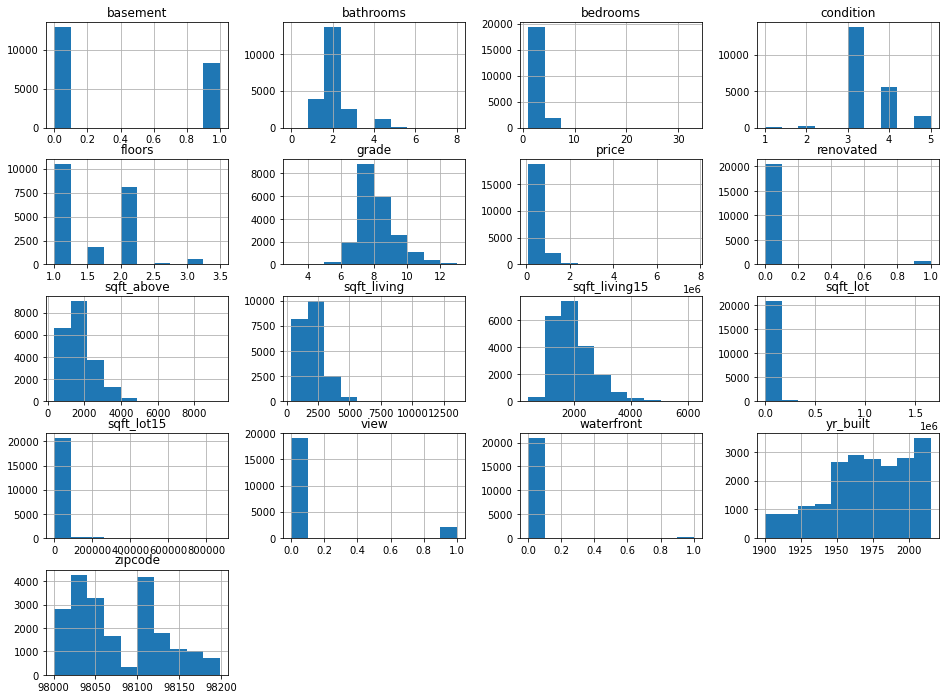

In [31]:
df.hist(figsize=(16, 12));

Notes: Look at bathrooms, bedrooms, price, sqft features

In [32]:
# bathrooms
#df['bathrooms'].hist();

In [33]:
#for i in range(90,100):
#    q = i/100
#    print("{} percentile: {}".format(q, df.bathrooms.quantile(q=q)))

In [34]:
#df['bathrooms'].value_counts()

In [35]:
# Set limit to 4
#df = df[df['bathrooms']<=4]

In [36]:
# bathrooms
#df['bathrooms'].hist();

In [37]:
# bedrooms
#df['bedrooms'].hist();

In [38]:
#df['bedrooms'].value_counts()

In [39]:
#for i in range(90,100):
#    q = i/100
#    print("{} percentile: {}".format(q, df.bedrooms.quantile(q=q)))

In [40]:
# Set limit to 12
#df = df[df['bedrooms']<=5]

In [41]:
#df['bedrooms'].hist()

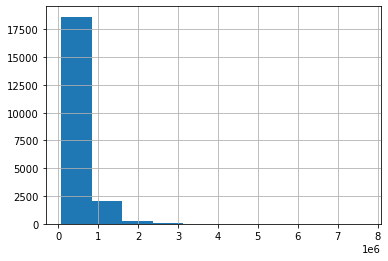

In [42]:
#price
df.price.hist();

In [43]:
df.price.value_counts()

350000.0    168
450000.0    167
550000.0    155
500000.0    149
425000.0    146
           ... 
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 3581, dtype: int64

In [44]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.9 percentile: 888998.0
0.91 percentile: 920000.0
0.92 percentile: 950000.0
0.93 percentile: 998000.0
0.94 percentile: 1070000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1400000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [45]:
# Set limit to 1100000
df = df[df['price']<=1100000]

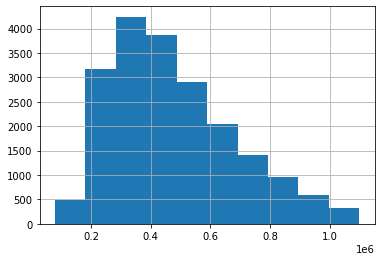

In [46]:
df.price.hist();

In [47]:
# features
sqft_feats = ['bathrooms', 'bedrooms','sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']

# Removes feats with z-score above 3 for specific columns
# Reference https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
for feat in sqft_feats:
    df = df[np.abs(df[feat]-df[feat].mean()) <= (3*df[feat].std())]

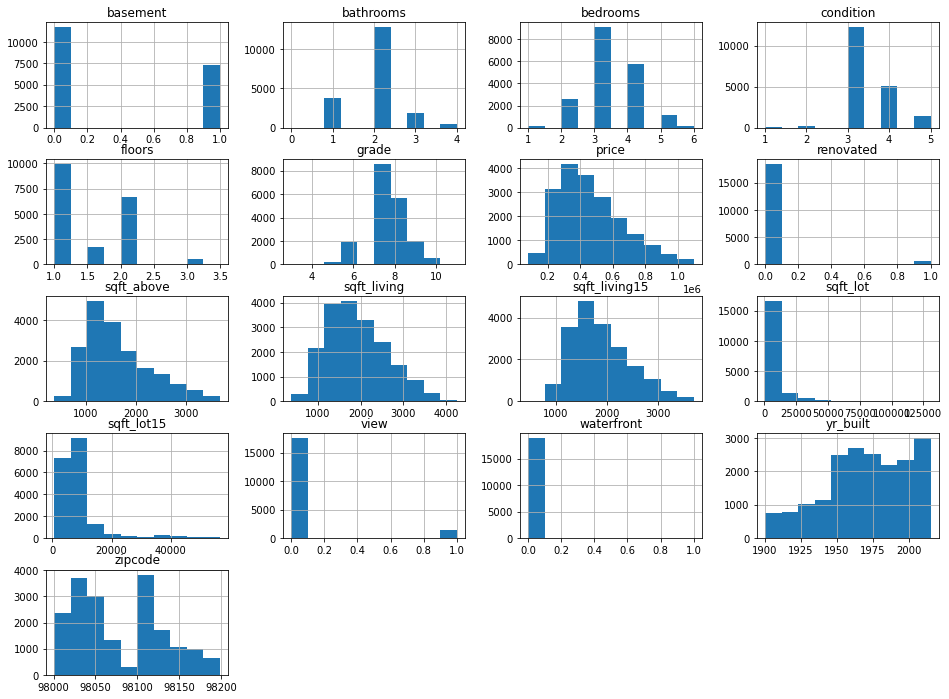

In [48]:
df.hist(figsize=(16,12));

## Normalize Continuous Features

In [49]:
# Log transform to reduce skewness
# Don't bother to normalize the price as this is the feature we will be predicting
# Remember that you can't take the logarithm of zero nor a negative number = N/A
log_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']
for var in log_feats:
    df[var]= np.log(df[var])

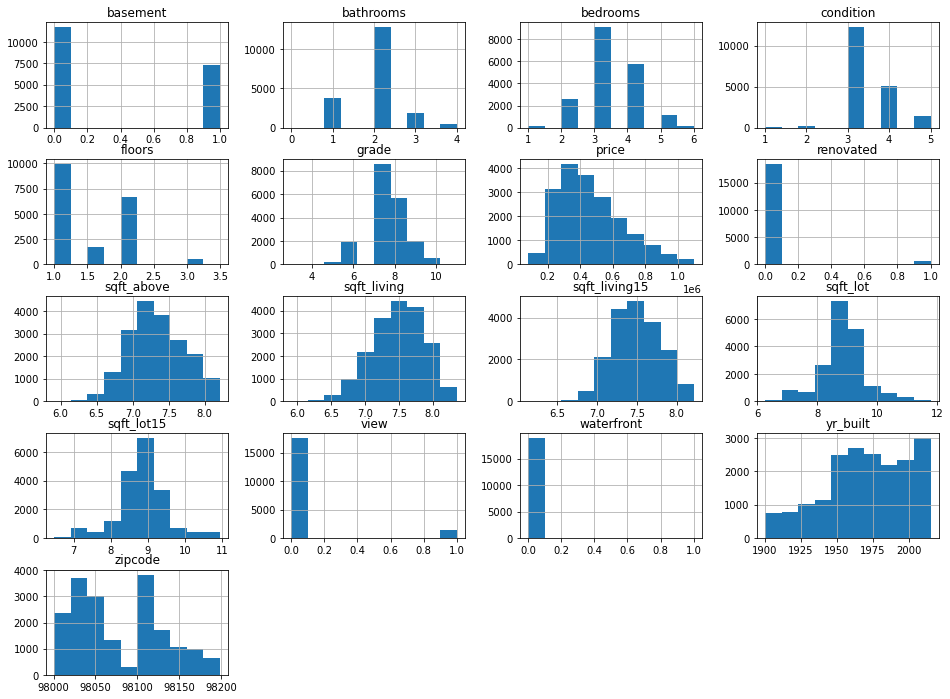

In [50]:
df.hist(figsize = (16,12));

In [51]:
# Standardization (z-score normalization)
# x' will have mean  𝜇=0  and  𝜎=1 
# Note that standardization does not make data moew normal, it will just change the mean and the standard error!

continuous_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']

for var in continuous_feats:
    df[var] = (df[var] - df[var].mean()) / df[var].std()

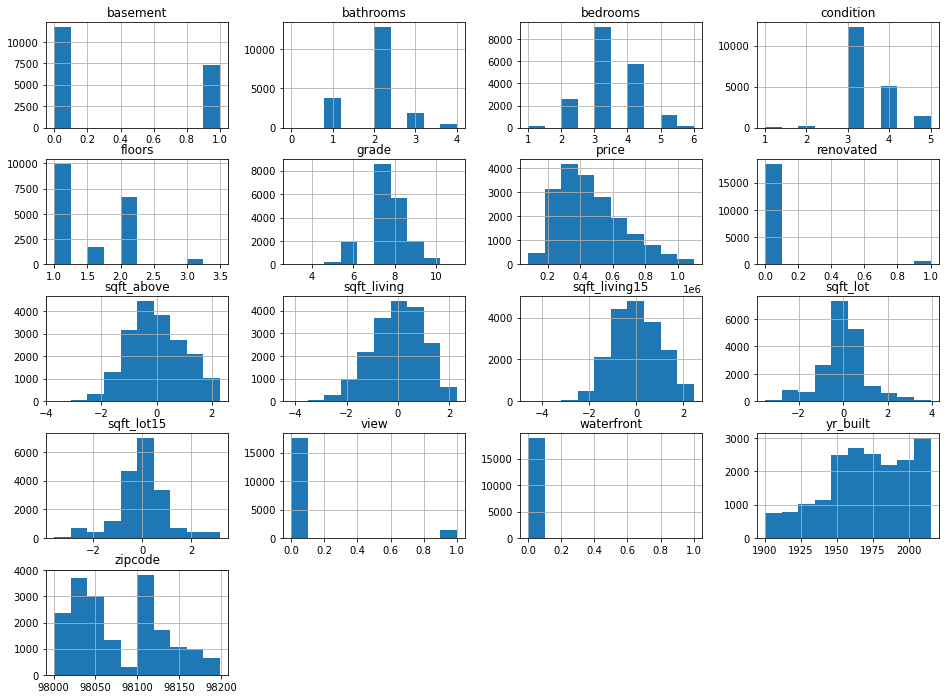

In [52]:
df.hist(figsize = (16, 12));

# Explore Data

## What are my top zip codes

In [53]:
df.zipcode.value_counts()

98103    568
98115    543
98052    534
98117    529
98042    513
        ... 
98010     75
98070     64
98148     55
98024     40
98039      6
Name: zipcode, Length: 70, dtype: int64

## Check for linearity

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warning

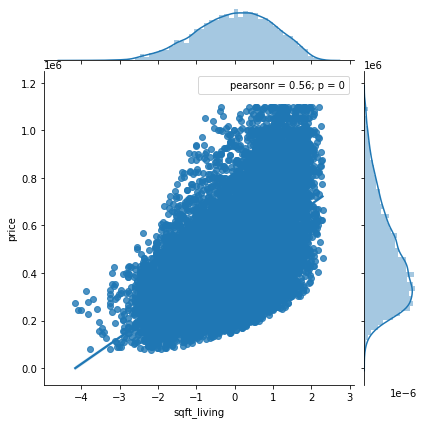

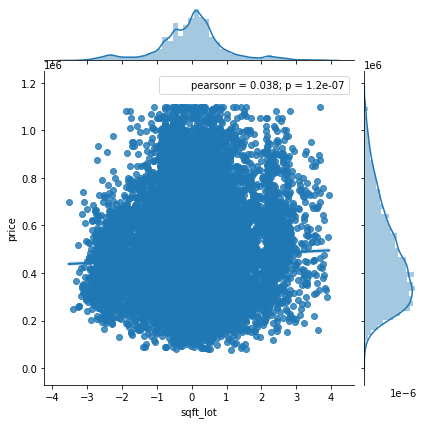

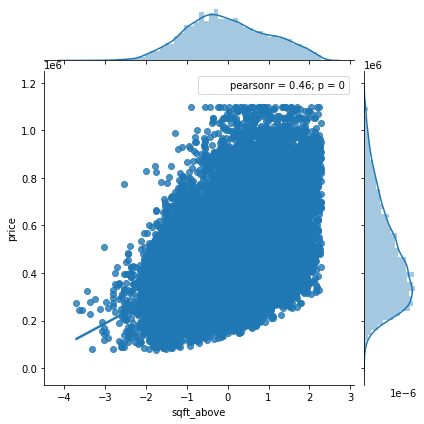

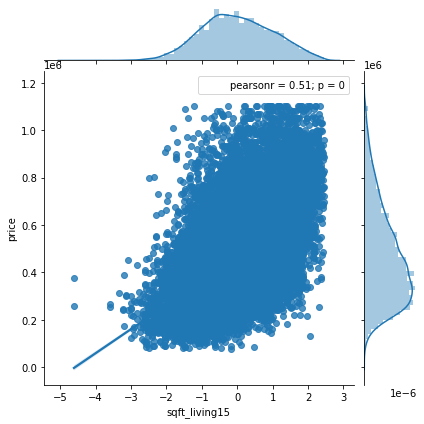

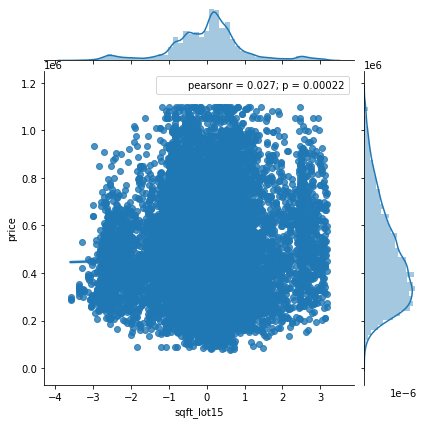

In [54]:
# Plot joint plots
continuous_feats = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

for feat in continuous_feats:
    j = sns.jointplot(x = df[feat], y = df['price'], kind = 'reg')
    j.annotate(stats.pearsonr)

Note: sqft_living has the best linear relationship with price

# Box Plots

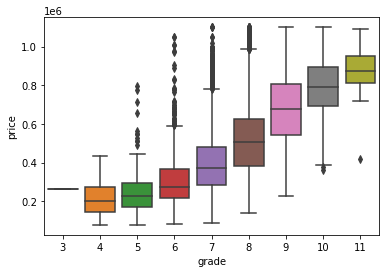

In [55]:
sns.boxplot(x = df['grade'], y = df['price'])

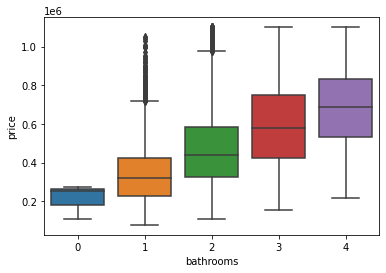

In [56]:
sns.boxplot(x = df['bathrooms'], y = df['price'])

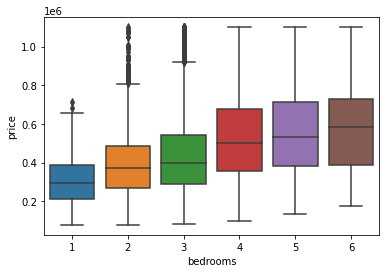

In [57]:
sns.boxplot(x = df['bedrooms'], y = df['price'])

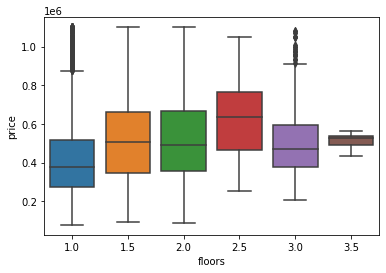

In [58]:
sns.boxplot(x = df['floors'], y = df['price'])

No relationship with price

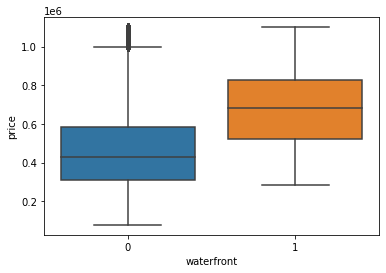

In [59]:
sns.boxplot(x = df['waterfront'], y = df['price'])

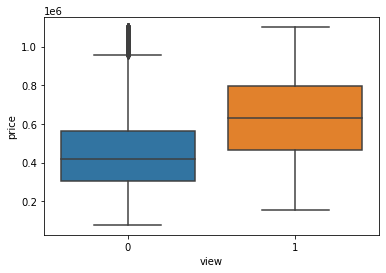

In [60]:
sns.boxplot(x = df['view'], y = df['price'])

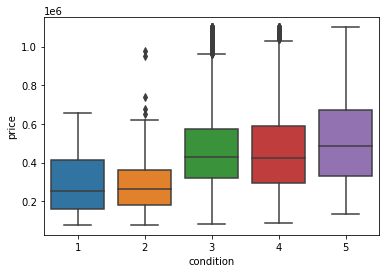

In [61]:
sns.boxplot(x = df['condition'], y = df['price'])

## Check for multicollinearity

In [62]:
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,1.000000,0.278099,0.385624,0.561192,0.038471,0.246482,0.048802,0.238946,0.061723,0.593353,0.462929,0.015622,0.002577,0.509797,0.026853,0.091077,0.188037
bedrooms,0.278099,1.000000,0.455097,0.635543,0.216207,0.144307,-0.021742,0.038315,0.031499,0.321669,0.509004,0.165814,-0.159958,0.399141,0.196207,-0.001716,0.153194
bathrooms,0.385624,0.455097,1.000000,0.622160,-0.004188,0.340552,-0.005822,0.107173,-0.050874,0.487697,0.498248,0.392487,-0.133081,0.415254,-0.007138,0.042756,0.231042
sqft_living,0.561192,0.635543,0.622160,1.000000,0.267451,0.324681,-0.002323,0.145878,-0.042334,0.669379,0.829882,0.349850,-0.211814,0.707060,0.246084,0.023079,0.235774
sqft_lot,0.038471,0.216207,-0.004188,0.267451,1.000000,-0.359091,0.050154,0.065152,0.122203,0.065662,0.243020,-0.086880,-0.258164,0.326703,0.909856,0.009262,-0.043635
floors,0.246482,0.144307,0.340552,0.324681,-0.359091,1.000000,-0.004291,-0.030226,-0.275390,0.451208,0.532836,0.508972,-0.061332,0.238216,-0.346081,-0.003421,-0.285677
waterfront,0.048802,-0.021742,-0.005822,-0.002323,0.050154,-0.004291,1.000000,0.167663,0.007011,-0.015500,-0.007541,-0.034443,0.045668,0.011602,0.057686,0.058100,0.009955
view,0.238946,0.038315,0.107173,0.145878,0.065152,-0.030226,0.167663,1.000000,0.040543,0.120534,0.051183,-0.085652,0.122548,0.183210,0.063300,0.048959,0.163350
condition,0.061723,0.031499,-0.050874,-0.042334,0.122203,-0.275390,0.007011,0.040543,1.000000,-0.162162,-0.152611,-0.351031,-0.010897,-0.095948,0.127833,-0.054688,0.127981
grade,0.593353,0.321669,0.487697,0.669379,0.065662,0.451208,-0.015500,0.120534,-0.162162,1.000000,0.677362,0.484500,-0.177750,0.624838,0.079297,-0.008684,0.019003


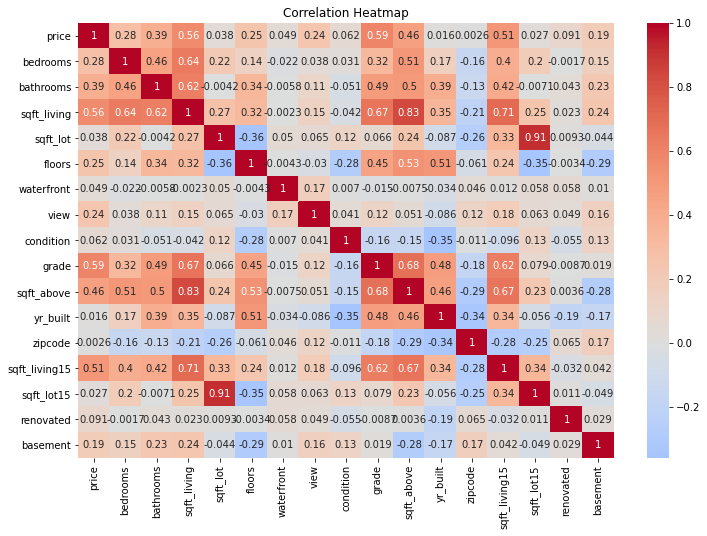

In [63]:
# Plot heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [64]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,1.000000,0.278099,0.385624,0.561192,0.038471,0.246482,0.048802,0.238946,0.061723,0.593353,0.462929,0.015622,0.002577,0.509797,0.026853,0.091077,0.188037
bedrooms,0.278099,1.000000,0.455097,0.635543,0.216207,0.144307,-0.021742,0.038315,0.031499,0.321669,0.509004,0.165814,-0.159958,0.399141,0.196207,-0.001716,0.153194
bathrooms,0.385624,0.455097,1.000000,0.622160,-0.004188,0.340552,-0.005822,0.107173,-0.050874,0.487697,0.498248,0.392487,-0.133081,0.415254,-0.007138,0.042756,0.231042
sqft_living,0.561192,0.635543,0.622160,1.000000,0.267451,0.324681,-0.002323,0.145878,-0.042334,0.669379,0.829882,0.349850,-0.211814,0.707060,0.246084,0.023079,0.235774
sqft_lot,0.038471,0.216207,-0.004188,0.267451,1.000000,-0.359091,0.050154,0.065152,0.122203,0.065662,0.243020,-0.086880,-0.258164,0.326703,0.909856,0.009262,-0.043635
floors,0.246482,0.144307,0.340552,0.324681,-0.359091,1.000000,-0.004291,-0.030226,-0.275390,0.451208,0.532836,0.508972,-0.061332,0.238216,-0.346081,-0.003421,-0.285677
waterfront,0.048802,-0.021742,-0.005822,-0.002323,0.050154,-0.004291,1.000000,0.167663,0.007011,-0.015500,-0.007541,-0.034443,0.045668,0.011602,0.057686,0.058100,0.009955
view,0.238946,0.038315,0.107173,0.145878,0.065152,-0.030226,0.167663,1.000000,0.040543,0.120534,0.051183,-0.085652,0.122548,0.183210,0.063300,0.048959,0.163350
condition,0.061723,0.031499,-0.050874,-0.042334,0.122203,-0.275390,0.007011,0.040543,1.000000,-0.162162,-0.152611,-0.351031,-0.010897,-0.095948,0.127833,-0.054688,0.127981
grade,0.593353,0.321669,0.487697,0.669379,0.065662,0.451208,-0.015500,0.120534,-0.162162,1.000000,0.677362,0.484500,-0.177750,0.624838,0.079297,-0.008684,0.019003


In [65]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_abs = corr.abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_abs['pairs'] = list(zip(df_abs.level_0, df_abs.level_1))

# set index to pairs
df_abs.set_index(['pairs'], inplace = True)

#d rop level columns
df_abs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_abs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_abs.drop_duplicates(inplace=True)

In [66]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [67]:
df_abs[(df_abs.cc>.75) & (df_abs.cc <1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.909856
"(sqft_above, sqft_living)",0.829882


In [68]:
df.drop(columns=['sqft_above', 'sqft_living15', 'sqft_lot15'], inplace=True) 

In [69]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode',
       'renovated', 'basement'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18948 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        18948 non-null  float64
 1   bedrooms     18948 non-null  int64  
 2   bathrooms    18948 non-null  int64  
 3   sqft_living  18948 non-null  float64
 4   sqft_lot     18948 non-null  float64
 5   floors       18948 non-null  float64
 6   waterfront   18948 non-null  int64  
 7   view         18948 non-null  int64  
 8   condition    18948 non-null  int64  
 9   grade        18948 non-null  int64  
 10  yr_built     18948 non-null  int64  
 11  zipcode      18948 non-null  int64  
 12  renovated    18948 non-null  int64  
 13  basement     18948 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.8 MB


## Save Results

In [71]:
df.to_csv("df_cleaned.csv", index=False)

## One-hot encode Categorical Features

In [72]:
categorical_feats = ['basement', 'bathrooms', 'bedrooms', 'condition', 'grade', 'renovated', 'view', 'waterfront', 'yr_built', 'zipcode', 'floors']

# Convert to str
for col in categorical_feats:
    df[col] = df[col].astype('str')   

In [73]:
df = pd.get_dummies(df, drop_first = True)

In [74]:
df.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-1.090208,-0.302383,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,0.966809,0.032680,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-2.218301,0.468225,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.250752,-0.467345,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.156614,0.180469,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Note: This is a lot of columns.

# Model Data

## Model 1: All available features

To start, perform a train-test split and create an initial regression model to model the price using all of your available features.

Note: In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.
If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.

In [75]:
subs = [(' ', '_'),('.','_'),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [76]:
df.columns = [col_formatting(col) for col in df.columns]

In [77]:
list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',


In [78]:
# Defining the problem
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [79]:
train, test = train_test_split(df)

In [80]:
print(len(train), len(test))
train.head()

14211 4737


,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
20865,765000.0,0.343486,-1.562027,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9381,820000.0,1.401939,2.543702,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16761,585000.0,-0.018705,0.270916,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8197,269950.0,-0.269084,0.022390,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13460,257000.0,-1.527605,-0.873760,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
test.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
7142,725000.0,0.872605,0.714312,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18199,452000.0,-1.251818,0.327814,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17648,340000.0,-2.470172,-0.260285,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3740,650000.0,0.925355,-0.113221,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9451,258000.0,-1.002112,0.248866,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [82]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     321.6
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:02:42   Log-Likelihood:            -1.8092e+05
No. Observations:               14211   AIC:                         3.623e+05
Df Residuals:                   13995   BIC:                         3.639e+05
Df Model:                         215                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.359e+05   8.69e+04      3.867      0.000    1.66e+05    5.06e+05
sqft_living    7.178e+04   1498.516     47.903      0.000    6.88e+04    7.47e+04
sqft_lot       2.384e+04   1204.377     19.797      0.000    2.15e+04    2.62e+04
bedrooms_2    -1.427e+04   7483.917     -1.907      0.057   -2.89e+04     397.233
bedrooms_3    -1.469e+04   7596.407     -1.934      0.053   -2.96e+04     198.347
bedrooms_4    -1.454e+04   7848.988     -1.853      0.064   -2.99e+04     840.787
bedrooms_5    -2.554e+04   8403.434     -3.039      0.002    -4.2e+04   -9068.528
bedrooms_6    -3.115e+04   1.08e+04     -2.878      0.004   -5.24e+04   -9933.282
bathrooms_1    3.434e+04   8.33e+04      0.412      0.680   -1.29e+05    1.98e+05
bathrooms_2    2.977e+04   8.33e+04      0.357      0.721   -1.33e+05    1.93e+05
bathrooms_3    5.159e+04   8.33e+04      0.619      0.536   -1.12e+05    2.15e+05
bathrooms_4    6.104e+04   8.34e+04      0.732      0.464   -1.02e+05    2.25e+05
floors_1_5    -2332.5972   3021.081     -0.772      0.440   -8254.320    3589.125
floors_2_0    -3953.8295   2595.976     -1.523      0.128   -9042.290    1134.631
floors_2_5    -1929.7676    1.1e+04     -0.176      0.861   -2.35e+04    1.96e+04
floors_3_0    -3.609e+04   5594.080     -6.452      0.000   -4.71e+04   -2.51e+04
floors_3_5     -4.69e+04   3.41e+04     -1.377      0.169   -1.14e+05    1.99e+04
waterfront_1   2.084e+05   1.51e+04     13.837      0.000    1.79e+05    2.38e+05
view_1          8.29e+04   2936.706     28.228      0.000    7.71e+04    8.87e+04
condition_2    7.781e+04    2.1e+04      3.713      0.000    3.67e+04    1.19e+05
condition_3    1.022e+05   1.94e+04      5.275      0.000    6.42e+04     1.4e+05
condition_4    1.216e+05   1.94e+04      6.277      0.000    8.36e+04     1.6e+05
condition_5    1.544e+05   1.95e+04      7.916      0.000    1.16e+05    1.93e+05
grade_11       9.282e+04   1.47e+04      6.328      0.000    6.41e+04    1.22e+05
grade_3       -1.072e-09   2.06e-09     -0.519      0.603   -5.12e-09    2.97e-09
grade_4        -1.86e+05    2.1e+04     -8.854      0.000   -2.27e+05   -1.45e+05
grade_5       -2.021e+05   8980.997    -22.498      0.000    -2.2e+05   -1.84e+05
grade_6       -2.032e+05   6017.995    -33.770      0.000   -2.15e+05   -1.91e+05
grade_7       -1.791e+05   5140.373    -34.841      0.000   -1.89e+05   -1.69e+05
grade_8       -1.324e+05   4796.827    -27.607      0.000   -1.42e+05   -1.23e+05
grade_9       -5.289e+04   4859.631    -10.885      0.000   -6.24e+04   -4.34e+04
yr_built_1901 -7.133e+04   2.12e+04     -3.369      0.001   -1.13e+05   -2.98e+04
yr_built_1902 -3.254e+04    2.3e+04     -1.417      0.157   -7.76e+04    1.25e+04
yr_built_1903 -3.885e+04   1.79e+04     -2.174      0.030   -7.39e+04   -3826.600
yr_built_1904 -2.039e+04   1.94e+04     -1.049   

## Remove the Uninfluential Features

In [83]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

217 149
['sqft_living', 'sqft_lot', 'bedrooms_5', 'bedrooms_6', 'floors_3_0']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,3.359e+05,8.69e+04,3.867,0.000,1.66e+05,5.06e+05
sqft_living,7.178e+04,1498.516,47.903,0.000,6.88e+04,7.47e+04
sqft_lot,2.384e+04,1204.377,19.797,0.000,2.15e+04,2.62e+04
bedrooms_2,-1.427e+04,7483.917,-1.907,0.057,-2.89e+04,397.233
bedrooms_3,-1.469e+04,7596.407,-1.934,0.053,-2.96e+04,198.347


In [84]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     455.7
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:02:42   Log-Likelihood:            -1.8105e+05
No. Observations:               14211   AIC:                         3.624e+05
Df Residuals:                   14061   BIC:                         3.635e+05
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.625e+05   2.01e+04     17.991      0.000    3.23e+05    4.02e+05
sqft_living    7.201e+04   1173.084     61.383      0.000    6.97e+04    7.43e+04
sqft_lot       2.385e+04   1080.610     22.072      0.000    2.17e+04     2.6e+04
bedrooms_5    -4222.5824   3124.103     -1.352      0.177   -1.03e+04    1901.075
bedrooms_6    -6639.6925   7392.876     -0.898      0.369   -2.11e+04    7851.325
floors_3_0    -3.332e+04   4831.065     -6.896      0.000   -4.28e+04   -2.38e+04
waterfront_1   2.048e+05   1.51e+04     13.550      0.000    1.75e+05    2.34e+05
view_1         8.378e+04   2924.643     28.647      0.000     7.8e+04    8.95e+04
condition_2    6.893e+04   2.09e+04      3.290      0.001    2.79e+04     1.1e+05
condition_3    9.314e+04   1.94e+04      4.812      0.000    5.52e+04    1.31e+05
condition_4     1.13e+05   1.94e+04      5.833      0.000     7.5e+04    1.51e+05
condition_5    1.463e+05   1.95e+04      7.508      0.000    1.08e+05    1.84e+05
grade_11       9.204e+04   1.47e+04      6.240      0.000    6.31e+04    1.21e+05
grade_4       -1.818e+05   2.08e+04     -8.737      0.000   -2.23e+05   -1.41e+05
grade_5       -2.031e+05   8745.736    -23.223      0.000    -2.2e+05   -1.86e+05
grade_6       -2.068e+05   5862.377    -35.281      0.000   -2.18e+05   -1.95e+05
grade_7       -1.857e+05   5029.685    -36.912      0.000   -1.96e+05   -1.76e+05
grade_8       -1.382e+05   4754.770    -29.067      0.000   -1.48e+05   -1.29e+05
grade_9       -5.584e+04   4867.013    -11.474      0.000   -6.54e+04   -4.63e+04
yr_built_1901 -6.584e+04   1.83e+04     -3.595      0.000   -1.02e+05   -2.99e+04
yr_built_1903 -3.336e+04   1.42e+04     -2.344      0.019   -6.13e+04   -5459.525
yr_built_1908 -4.858e+04   1.04e+04     -4.674      0.000    -6.9e+04   -2.82e+04
yr_built_1918 -2.984e+04   9374.885     -3.183      0.001   -4.82e+04   -1.15e+04
yr_built_1934 -6.383e+04   2.32e+04     -2.748      0.006   -1.09e+05   -1.83e+04
yr_built_1940 -2.209e+04   8096.688     -2.728      0.006    -3.8e+04   -6219.697
yr_built_1942 -2.965e+04   6692.565     -4.430      0.000   -4.28e+04   -1.65e+04
yr_built_1943 -3.024e+04   7786.940     -3.884      0.000   -4.55e+04    -1.5e+04
yr_built_1944 -2.177e+04   8395.388     -2.593      0.010   -3.82e+04   -5313.897
yr_built_1946 -2.421e+04   9561.042     -2.532      0.011    -4.3e+04   -5469.375
yr_built_1947 -2.389e+04   6425.002     -3.718      0.000   -3.65e+04   -1.13e+04
yr_built_1948 -2.227e+04   6724.100     -3.312      0.001   -3.55e+04   -9091.905
yr_built_1949 -1.945e+04   7608.736     -2.556      0.011   -3.44e+04   -4537.361
yr_built_1950 -3.019e+04   6644.002     -4.543      0.000   -4.32e+04   -1.72e+04
yr_built_1951 -3.351e+04   7006.930     -4.783      0.000   -4.72e+04   -1.98e+04
yr_built_1952  -2.26e+04   7028.026     -3.215   

Comment: You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [85]:
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 2.8090736514853725),
 ('sqft_lot', 2.384665637539051),
 ('bedrooms_5', 1.1841850175804793),
 ('bedrooms_6', 1.0540657994600893),
 ('floors_3_0', 1.3872070955311937),
 ('waterfront_1', 1.1059269667664013),
 ('view_1', 1.2685567848837096),
 ('condition_2', 1.4612729987355113),
 ('condition_3', 36.41792355961612),
 ('condition_4', 16.423110321421845),
 ('condition_5', 5.609556849998738),
 ('grade_11', 1.099261725773781),
 ('grade_4', 1.1274177422328528),
 ('grade_5', 1.7488834363339176),
 ('grade_6', 6.841010418689225),
 ('grade_7', 21.976080640024367),
 ('grade_8', 13.027742579557064),
 ('grade_9', 4.91723523604731),
 ('yr_built_1901', 1.0192908597934411),
 ('yr_built_1903', 1.0264067431503927),
 ('yr_built_1908', 1.0311364792897912),
 ('yr_built_1918', 1.0433776801093813),
 ('yr_built_1934', 1.014147350975886),
 ('yr_built_1940', 1.0520834646031014),
 ('yr_built_1942', 1.1144084494084392),
 ('yr_built_1943', 1.0911418673222744),
 ('yr_built_1944', 1.0903361549589132),
 

## Perform Another Round of Feature Selection

In [86]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

149 143


In [87]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     407.4
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:03:05   Log-Likelihood:            -1.8195e+05
No. Observations:               14211   AIC:                         3.642e+05
Df Residuals:                   14067   BIC:                         3.653e+05
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.968e+05   2936.646    101.051      0.000    2.91e+05    3.03e+05
sqft_living    9.258e+04   1055.566     87.703      0.000    9.05e+04    9.46e+04
sqft_lot       2.492e+04   1132.210     22.013      0.000    2.27e+04    2.71e+04
bedrooms_5    -1.262e+04   3316.544     -3.806      0.000   -1.91e+04   -6121.701
bedrooms_6    -2.281e+04   7856.512     -2.903      0.004   -3.82e+04   -7410.088
floors_3_0     -2.08e+04   5101.114     -4.078      0.000   -3.08e+04   -1.08e+04
waterfront_1   2.009e+05   1.61e+04     12.496      0.000    1.69e+05    2.32e+05
view_1         9.297e+04   3100.755     29.983      0.000    8.69e+04     9.9e+04
condition_2   -3.424e+04   8880.996     -3.855      0.000   -5.16e+04   -1.68e+04
grade_11        1.94e+05   1.52e+04     12.744      0.000    1.64e+05    2.24e+05
grade_4        3.842e+04   2.13e+04      1.807      0.071   -3259.543    8.01e+04
grade_5        3721.9555   7179.321      0.518      0.604   -1.04e+04    1.78e+04
grade_9        7.253e+04   2713.707     26.728      0.000    6.72e+04    7.79e+04
yr_built_1901 -7.662e+04   1.95e+04     -3.931      0.000   -1.15e+05   -3.84e+04
yr_built_1903 -4.228e+04   1.51e+04     -2.792      0.005    -7.2e+04   -1.26e+04
yr_built_1908 -5.393e+04   1.11e+04     -4.878      0.000   -7.56e+04   -3.23e+04
yr_built_1918 -3.628e+04   9959.705     -3.643      0.000   -5.58e+04   -1.68e+04
yr_built_1934 -6.959e+04   2.47e+04     -2.814      0.005   -1.18e+05   -2.11e+04
yr_built_1940 -3.131e+04   8609.124     -3.637      0.000   -4.82e+04   -1.44e+04
yr_built_1942 -3.059e+04   7095.072     -4.311      0.000   -4.45e+04   -1.67e+04
yr_built_1943 -3.548e+04   8258.915     -4.296      0.000   -5.17e+04   -1.93e+04
yr_built_1944 -3.054e+04   8890.515     -3.435      0.001    -4.8e+04   -1.31e+04
yr_built_1946  -3.59e+04   1.02e+04     -3.533      0.000   -5.58e+04    -1.6e+04
yr_built_1947 -3.131e+04   6828.840     -4.585      0.000   -4.47e+04   -1.79e+04
yr_built_1948 -2.816e+04   7152.808     -3.937      0.000   -4.22e+04   -1.41e+04
yr_built_1949 -1.974e+04   8093.996     -2.439      0.015   -3.56e+04   -3874.852
yr_built_1950 -3.522e+04   7066.240     -4.984      0.000   -4.91e+04   -2.14e+04
yr_built_1951 -3.514e+04   7455.211     -4.714      0.000   -4.98e+04   -2.05e+04
yr_built_1952 -2.533e+04   7467.750     -3.392      0.001      -4e+04   -1.07e+04
yr_built_1953 -4.198e+04   7762.606     -5.408      0.000   -5.72e+04   -2.68e+04
yr_built_1954  -4.48e+04   6424.352     -6.974      0.000   -5.74e+04   -3.22e+04
yr_built_1955 -5.619e+04   6898.634     -8.144      0.000   -6.97e+04   -4.27e+04
yr_built_1956 -4.585e+04   7695.331     -5.958      0.000   -6.09e+04   -3.08e+04
yr_built_1957 -5.951e+04   7895.441     -7.537      0.000    -7.5e+04    -4.4e+04
yr_built_1958 -4.242e+04   7199.746     -5.892   

Note: There are still p_values > 0.05

## Remove Uninfluential features

In [88]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

144 136
['sqft_living', 'sqft_lot', 'bedrooms_5', 'bedrooms_6', 'floors_3_0']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2.968e+05,2936.646,101.051,0.000,2.91e+05,3.03e+05
sqft_living,9.258e+04,1055.566,87.703,0.000,9.05e+04,9.46e+04
sqft_lot,2.492e+04,1132.210,22.013,0.000,2.27e+04,2.71e+04
bedrooms_5,-1.262e+04,3316.544,-3.806,0.000,-1.91e+04,-6121.701
bedrooms_6,-2.281e+04,7856.512,-2.903,0.004,-3.82e+04,-7410.088


In [89]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     427.9
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:03:06   Log-Likelihood:            -1.8195e+05
No. Observations:               14211   AIC:                         3.642e+05
Df Residuals:                   14074   BIC:                         3.652e+05
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.945e+05   2842.148    103.612      0.000    2.89e+05       3e+05
sqft_living    9.203e+04   1028.607     89.470      0.000       9e+04     9.4e+04
sqft_lot       2.545e+04   1106.071     23.009      0.000    2.33e+04    2.76e+04
bedrooms_5    -1.227e+04   3314.516     -3.703      0.000   -1.88e+04   -5775.202
bedrooms_6    -2.245e+04   7853.217     -2.859      0.004   -3.78e+04   -7057.476
floors_3_0    -2.283e+04   5027.689     -4.542      0.000   -3.27e+04    -1.3e+04
waterfront_1   2.014e+05   1.61e+04     12.534      0.000     1.7e+05    2.33e+05
view_1         9.335e+04   3099.181     30.121      0.000    8.73e+04    9.94e+04
condition_2    -3.28e+04   8855.870     -3.704      0.000   -5.02e+04   -1.54e+04
grade_11       1.937e+05   1.52e+04     12.722      0.000    1.64e+05    2.24e+05
grade_9        7.247e+04   2709.131     26.750      0.000    6.72e+04    7.78e+04
yr_built_1901 -7.502e+04   1.95e+04     -3.849      0.000   -1.13e+05   -3.68e+04
yr_built_1903 -4.098e+04   1.51e+04     -2.706      0.007   -7.07e+04   -1.13e+04
yr_built_1908 -5.276e+04   1.11e+04     -4.774      0.000   -7.44e+04   -3.11e+04
yr_built_1918 -3.467e+04   9954.650     -3.483      0.000   -5.42e+04   -1.52e+04
yr_built_1934 -6.536e+04   2.47e+04     -2.648      0.008   -1.14e+05    -1.7e+04
yr_built_1940 -3.026e+04   8602.931     -3.518      0.000   -4.71e+04   -1.34e+04
yr_built_1942 -2.942e+04   7082.603     -4.154      0.000   -4.33e+04   -1.55e+04
yr_built_1943 -3.423e+04   8242.385     -4.153      0.000   -5.04e+04   -1.81e+04
yr_built_1944 -2.941e+04   8879.084     -3.312      0.001   -4.68e+04    -1.2e+04
yr_built_1946 -3.481e+04   1.02e+04     -3.427      0.001   -5.47e+04   -1.49e+04
yr_built_1947 -2.993e+04   6819.278     -4.388      0.000   -4.33e+04   -1.66e+04
yr_built_1948  -2.67e+04   7143.190     -3.737      0.000   -4.07e+04   -1.27e+04
yr_built_1949 -1.804e+04   8084.539     -2.232      0.026   -3.39e+04   -2196.001
yr_built_1950 -3.407e+04   7054.572     -4.830      0.000   -4.79e+04   -2.02e+04
yr_built_1951 -3.402e+04   7444.695     -4.569      0.000   -4.86e+04   -1.94e+04
yr_built_1952 -2.395e+04   7455.986     -3.212      0.001   -3.86e+04   -9337.024
yr_built_1953 -4.065e+04   7750.561     -5.245      0.000   -5.58e+04   -2.55e+04
yr_built_1954 -4.345e+04   6404.914     -6.783      0.000    -5.6e+04   -3.09e+04
yr_built_1955 -5.479e+04   6874.573     -7.970      0.000   -6.83e+04   -4.13e+04
yr_built_1956  -4.44e+04   7675.875     -5.785      0.000   -5.94e+04   -2.94e+04
yr_built_1957 -5.808e+04   7875.042     -7.375      0.000   -7.35e+04   -4.26e+04
yr_built_1958 -4.102e+04   7174.311     -5.717      0.000   -5.51e+04    -2.7e+04
yr_built_1959 -4.353e+04   6155.922     -7.071      0.000   -5.56e+04   -3.15e+04
yr_built_1960 -3.467e+04   7033.236     -4.930   

# Check the Normality Assumption

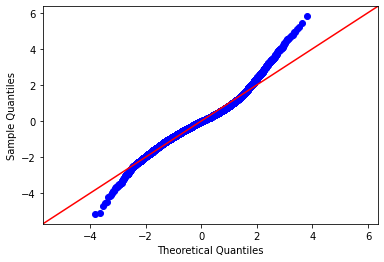

In [90]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Note: There appears to be some issues with the residuals not being normally distributed.
Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Check Homoscedasticity Assumption

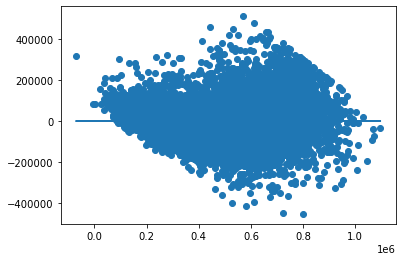

In [91]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Note: Whilst not ideal, there is no strong evidence of heteroscedasticity. As such we might not need to consider a log transformation of the target variable.

## Evaluate Model using sci-kit learn's cross_val_score

In [92]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([89497.79715616, 88489.55697048, 93256.45392434, 83538.34765009,
       91196.16365693, 91242.42140503, 84218.888257  , 88744.45707736,
       93023.46845913, 86247.81404072])

88945.53685972307

3239.8222853441566

We can interpret the RMSE as the mean error in USD, i.e. on average the actual price will be USD 97,000 more or less than our predicted price. The standard deviation of around USD 1900 is decent meaning our model doest not appear to be overfitting.

130 features

In [93]:
X_train.head()

,sqft_living,sqft_lot,bedrooms_5,bedrooms_6,floors_3_0,waterfront_1,view_1,condition_2,grade_11,grade_9,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
20865,0.343486,-1.562027,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9381,1.401939,2.543702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16761,-0.018705,0.270916,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8197,-0.269084,0.022390,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13460,-1.527605,-0.873760,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Save model using pickle

# Model 2: Remove yr_built and zip code

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18948 entries, 0 to 21596
Columns: 217 entries, price to basement_1
dtypes: float64(3), uint8(214)
memory usage: 5.1 MB


In [95]:
df.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-1.090208,-0.302383,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,0.966809,0.032680,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-2.218301,0.468225,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.250752,-0.467345,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.156614,0.180469,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [96]:
list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',


In [97]:
model_2_df = df[['price',
 'sqft_living',
 'sqft_lot',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
'renovated_1',
 'basement_1']]

In [98]:
model_2_df.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,grade_11,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,renovated_1,basement_1
0,221900.0,-1.090208,-0.302383,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,0.966809,0.032680,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
2,180000.0,-2.218301,0.468225,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,604000.0,0.250752,-0.467345,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,510000.0,-0.156614,0.180469,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [99]:
# Defining the problem
outcome = 'price'
x_cols = list(model_2_df.columns)
x_cols.remove(outcome)

In [100]:
train, test = train_test_split(model_2_df)

In [101]:
print(len(train), len(test))
train.head()

14211 4737


,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,grade_11,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,renovated_1,basement_1
5842,572500.0,0.883240,0.095851,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
20897,299999.0,-0.734533,-2.355874,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
8690,536500.0,-0.715030,-1.802053,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
631,565000.0,-0.773977,-0.221258,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
4846,428000.0,-0.612131,-1.731370,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [102]:
test.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,grade_11,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,renovated_1,basement_1
5181,750000.0,1.357967,-0.486375,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
12244,994000.0,1.760261,1.433497,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2782,340000.0,1.803318,0.024829,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6702,455000.0,1.331228,-0.608955,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
11188,700000.0,0.893832,0.057792,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [103]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     460.4
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:03:07   Log-Likelihood:            -1.8865e+05
No. Observations:               14211   AIC:                         3.774e+05
Df Residuals:                   14179   BIC:                         3.776e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.128e+05   8.82e+04      8.081      0.000     5.4e+05    8.86e+05
sqft_living   6.904e+04   2393.073     28.851      0.000    6.44e+04    7.37e+04
sqft_lot     -1.769e+04   1570.693    -11.263      0.000   -2.08e+04   -1.46e+04
bedrooms_2   -2281.4180   9393.406     -0.243      0.808   -2.07e+04    1.61e+04
bedrooms_3   -4.906e+04   8981.895     -5.463      0.000   -6.67e+04   -3.15e+04
bedrooms_4   -5.237e+04   9163.992     -5.715      0.000   -7.03e+04   -3.44e+04
bedrooms_5   -5.569e+04   1.01e+04     -5.496      0.000   -7.56e+04   -3.58e+04
bathrooms_1   5.884e+04   8.17e+04      0.720      0.471   -1.01e+05    2.19e+05
bathrooms_2   2.756e+04   8.17e+04      0.337      0.736   -1.33e+05    1.88e+05
bathrooms_3    4.69e+04   8.18e+04      0.573      0.567   -1.14e+05    2.07e+05
bathrooms_4   6.031e+04   8.21e+04      0.735      0.463   -1.01e+05    2.21e+05
floors_1_5    7.331e+04   4484.384     16.348      0.000    6.45e+04    8.21e+04
floors_2_0   -1.614e+04   3788.755     -4.260      0.000   -2.36e+04   -8712.487
floors_2_5    3.216e+04   1.81e+04      1.778      0.075   -3284.744    6.76e+04
floors_3_0      1.9e+04   8598.691      2.209      0.027    2143.706    3.59e+04
floors_3_5   -6882.9488   7.08e+04     -0.097      0.923   -1.46e+05    1.32e+05
waterfront_1   1.47e+05   2.63e+04      5.591      0.000    9.55e+04    1.99e+05
view_1        7.652e+04   4838.779     15.813      0.000     6.7e+04     8.6e+04
condition_2   -3.89e+04   3.39e+04     -1.149      0.251   -1.05e+05    2.75e+04
condition_3  -1.785e+04   3.12e+04     -0.572      0.568   -7.91e+04    4.34e+04
condition_4   2.218e+04   3.13e+04      0.710      0.478   -3.91e+04    8.34e+04
condition_5   7.321e+04   3.15e+04      2.327      0.020    1.15e+04    1.35e+05
grade_11      8.072e+04   2.34e+04      3.443      0.001    3.48e+04    1.27e+05
grade_3      -3.435e+05   1.42e+05     -2.420      0.016   -6.22e+05   -6.53e+04
grade_4       -3.89e+05   3.42e+04    -11.387      0.000   -4.56e+05   -3.22e+05
grade_5      -4.047e+05   1.44e+04    -28.126      0.000   -4.33e+05   -3.76e+05
grade_6      -3.817e+05   9463.665    -40.335      0.000      -4e+05   -3.63e+05
grade_7      -3.151e+05   8184.171    -38.496      0.000   -3.31e+05   -2.99e+05
grade_8      -2.236e+05   7813.265    -28.614      0.000   -2.39e+05   -2.08e+05
grade_9      -9.677e+04   8071.555    -11.989      0.000   -1.13e+05   -8.09e+04
renovated_1   9.703e+04   7025.553     13.812      0.000    8.33e+04    1.11e+05
basement_1     3.03e+04   3068.170      9.875      0.000    2.43e+04    3.63e+04
==============================================================================
Omnibus:                      629.676   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              774.879
Skew:      

## Perform stepwise selection

In [104]:
model_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18948 entries, 0 to 21596
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         18948 non-null  float64
 1   sqft_living   18948 non-null  float64
 2   sqft_lot      18948 non-null  float64
 3   bedrooms_2    18948 non-null  uint8  
 4   bedrooms_3    18948 non-null  uint8  
 5   bedrooms_4    18948 non-null  uint8  
 6   bedrooms_5    18948 non-null  uint8  
 7   bathrooms_1   18948 non-null  uint8  
 8   bathrooms_2   18948 non-null  uint8  
 9   bathrooms_3   18948 non-null  uint8  
 10  bathrooms_4   18948 non-null  uint8  
 11  floors_1_5    18948 non-null  uint8  
 12  floors_2_0    18948 non-null  uint8  
 13  floors_2_5    18948 non-null  uint8  
 14  floors_3_0    18948 non-null  uint8  
 15  floors_3_5    18948 non-null  uint8  
 16  waterfront_1  18948 non-null  uint8  
 17  view_1        18948 non-null  uint8  
 18  condition_2   18948 non-nu

In [105]:
'''
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward`-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
'''

'\ndef stepwise_selection(X, y, \n                       initial_list=[], \n                       threshold_in=0.01, \n                       threshold_out = 0.05, \n                       verbose=True):\n    """ Perform a forward`-backward feature selection \n    based on p-value from statsmodels.api.OLS\n    Arguments:\n        X - pandas.DataFrame with candidate features\n        y - list-like with the target\n        initial_list - list of features to start with (column names of X)\n        threshold_in - include a feature if its p-value < threshold_in\n        threshold_out - exclude a feature if its p-value > threshold_out\n        verbose - whether to print the sequence of inclusions and exclusions\n    Returns: list of selected features \n    Always set threshold_in < threshold_out to avoid infinite looping.\n    See https://en.wikipedia.org/wiki/Stepwise_regression for the details\n    """\n    included = list(initial_list)\n    while True:\n        changed=False\n        # f

In [106]:
'''
X = model_2_df.drop('price', axis=1)
y = model_2_df['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)
'''

"\nX = model_2_df.drop('price', axis=1)\ny = model_2_df['price']\n\nresult = stepwise_selection(X, y, verbose = True)\nprint('resulting features:')\nprint(result)\n"

In [107]:
'''
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()
'''

'\nX_fin = X[result]\nX_with_intercept = sm.add_constant(X_fin)\nmodel = sm.OLS(y,X_with_intercept).fit()\nmodel.summary()\n'

Note much of a difference in Adj. R-squared.

21 features, underfitting due to low Adj. R-squared.

# Model 3: Remove yr_built 

In [149]:
model_3_df = df[['price',
 'sqft_living',
 'sqft_lot',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'zipcode_98039',
 'zipcode_98004',
 'zipcode_98040',
 'zipcode_98112',
 'zipcode_98005',
 'zipcode_98119',              
 'zipcode_98109',
 'zipcode_98075',
 'zipcode_98006',
 'zipcode_98102',               
 'renovated_1',
 'basement_1']]

In [ ]:
#  'floors_1_5',
#  'floors_2_0',
#  'floors_2_5',
#  'floors_3_0',
#  'floors_3_5',

In [150]:
model_3_df.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,zipcode_98040,zipcode_98112,zipcode_98005,zipcode_98119,zipcode_98109,zipcode_98075,zipcode_98006,zipcode_98102,renovated_1,basement_1
0,221900.0,-1.090208,-0.302383,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,0.966809,0.032680,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-2.218301,0.468225,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.250752,-0.467345,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.156614,0.180469,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
# Defining the problem
outcome = 'price'
x_cols = list(model_3_df.columns)
x_cols.remove(outcome)

In [152]:
train, test = train_test_split(model_3_df)

In [153]:
print(len(train), len(test))
train.head()

14211 4737


,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,zipcode_98040,zipcode_98112,zipcode_98005,zipcode_98119,zipcode_98109,zipcode_98075,zipcode_98006,zipcode_98102,renovated_1,basement_1
1128,369000.0,0.946163,-0.155404,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8241,170000.0,-0.875240,1.517013,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18400,850000.0,0.861928,0.295683,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3780,440000.0,-0.854675,-2.300162,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17240,401750.0,-1.348807,-2.353688,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [154]:
test.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,zipcode_98040,zipcode_98112,zipcode_98005,zipcode_98119,zipcode_98109,zipcode_98075,zipcode_98006,zipcode_98102,renovated_1,basement_1
9566,460000.0,0.054911,0.132866,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5965,425000.0,-0.563981,-0.076958,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
12870,472500.0,-0.563981,0.254571,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18598,515000.0,0.684948,-0.401748,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4716,266000.0,-1.228117,0.208572,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     519.3
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:20:02   Log-Likelihood:            -1.8762e+05
No. Observations:               14211   AIC:                         3.753e+05
Df Residuals:                   14174   BIC:                         3.756e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.038e+05   1.35e+05      4.469      0.000    3.39e+05    8.69e+05
sqft_living    6.863e+04   2115.677     32.437      0.000    6.45e+04    7.28e+04
sqft_lot      -1.881e+04   1269.033    -14.825      0.000   -2.13e+04   -1.63e+04
bedrooms_2     -648.4971   8818.596     -0.074      0.941   -1.79e+04    1.66e+04
bedrooms_3    -3.932e+04   8443.504     -4.657      0.000   -5.59e+04   -2.28e+04
bedrooms_4    -3.916e+04   8611.988     -4.547      0.000    -5.6e+04   -2.23e+04
bedrooms_5     -3.74e+04   9495.898     -3.939      0.000    -5.6e+04   -1.88e+04
bathrooms_1     8.39e+04   1.31e+05      0.639      0.523   -1.74e+05    3.41e+05
bathrooms_2    4.534e+04   1.31e+05      0.345      0.730   -2.12e+05    3.03e+05
bathrooms_3    6.557e+04   1.31e+05      0.499      0.618   -1.92e+05    3.23e+05
bathrooms_4    7.736e+04   1.32e+05      0.588      0.557   -1.81e+05    3.35e+05
waterfront_1   1.433e+05   2.53e+04      5.661      0.000    9.37e+04    1.93e+05
view_1         8.731e+04   4469.091     19.536      0.000    7.86e+04    9.61e+04
condition_2   -7809.4071    3.2e+04     -0.244      0.807   -7.05e+04    5.49e+04
condition_3    7429.1590   2.97e+04      0.250      0.802   -5.07e+04    6.56e+04
condition_4    3.719e+04   2.97e+04      1.254      0.210    -2.1e+04    9.53e+04
condition_5    9.807e+04   2.99e+04      3.285      0.001    3.95e+04    1.57e+05
grade_11       9.618e+04   2.45e+04      3.928      0.000    4.82e+04    1.44e+05
grade_3       -2.849e+05   1.32e+05     -2.158      0.031   -5.44e+05   -2.62e+04
grade_4       -3.251e+05   2.99e+04    -10.889      0.000   -3.84e+05   -2.67e+05
grade_5         -3.4e+05   1.34e+04    -25.336      0.000   -3.66e+05   -3.14e+05
grade_6       -3.153e+05   8804.950    -35.813      0.000   -3.33e+05   -2.98e+05
grade_7       -2.617e+05   7609.853    -34.393      0.000   -2.77e+05   -2.47e+05
grade_8        -1.89e+05   7288.063    -25.935      0.000   -2.03e+05   -1.75e+05
grade_9       -7.704e+04   7514.801    -10.252      0.000   -9.18e+04   -6.23e+04
zipcode_98039  5.245e+05   6.57e+04      7.985      0.000    3.96e+05    6.53e+05
zipcode_98004  3.649e+05   1.19e+04     30.587      0.000    3.42e+05    3.88e+05
zipcode_98040  2.691e+05   1.24e+04     21.776      0.000    2.45e+05    2.93e+05
zipcode_98112  2.215e+05   1.19e+04     18.679      0.000    1.98e+05    2.45e+05
zipcode_98005  1.986e+05   1.29e+04     15.394      0.000    1.73e+05    2.24e+05
zipcode_98119  1.889e+05   1.27e+04     14.817      0.000    1.64e+05    2.14e+05
zipcode_98109  2.015e+05   1.77e+04     11.415      0.000    1.67e+05    2.36e+05
zipcode_98075  1.098e+05   9548.948     11.503      0.000    9.11e+04    1.29e+05
zipcode_98006  1.221e+05   7974.643     15.306      0.000    1.06e+05    1.38e+05
zipcode_98102  1.869e+05   1.71e+04     10.928   

## Remove Uninfluential features part 2

In [156]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

37 28
['sqft_living', 'sqft_lot', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,6.038e+05,1.35e+05,4.469,0.000,3.39e+05,8.69e+05
sqft_living,6.863e+04,2115.677,32.437,0.000,6.45e+04,7.28e+04
sqft_lot,-1.881e+04,1269.033,-14.825,0.000,-2.13e+04,-1.63e+04
bedrooms_2,-648.4971,8818.596,-0.074,0.941,-1.79e+04,1.66e+04
bedrooms_3,-3.932e+04,8443.504,-4.657,0.000,-5.59e+04,-2.28e+04


In [157]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     645.5
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:20:20   Log-Likelihood:            -1.8776e+05
No. Observations:               14211   AIC:                         3.756e+05
Df Residuals:                   14182   BIC:                         3.758e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.78e+05   7607.805     89.120      0.000    6.63e+05    6.93e+05
sqft_living    6.247e+04   1957.756     31.910      0.000    5.86e+04    6.63e+04
sqft_lot      -1.516e+04   1233.090    -12.292      0.000   -1.76e+04   -1.27e+04
bedrooms_3    -4.513e+04   3571.330    -12.638      0.000   -5.21e+04   -3.81e+04
bedrooms_4    -4.263e+04   4312.590     -9.885      0.000   -5.11e+04   -3.42e+04
bedrooms_5    -3.464e+04   6067.001     -5.710      0.000   -4.65e+04   -2.27e+04
waterfront_1    1.39e+05   2.55e+04      5.443      0.000    8.89e+04    1.89e+05
view_1         9.161e+04   4501.096     20.353      0.000    8.28e+04       1e+05
condition_5    7.973e+04   4206.507     18.954      0.000    7.15e+04     8.8e+04
grade_11        9.52e+04   2.47e+04      3.852      0.000    4.68e+04    1.44e+05
grade_3       -2.799e+05   1.33e+05     -2.105      0.035   -5.41e+05   -1.93e+04
grade_4       -3.212e+05   2.98e+04    -10.765      0.000    -3.8e+05   -2.63e+05
grade_5       -3.283e+05   1.33e+04    -24.591      0.000   -3.54e+05   -3.02e+05
grade_6       -3.038e+05   8772.354    -34.626      0.000   -3.21e+05   -2.87e+05
grade_7       -2.618e+05   7586.899    -34.501      0.000   -2.77e+05   -2.47e+05
grade_8       -1.937e+05   7279.306    -26.606      0.000   -2.08e+05   -1.79e+05
grade_9        -7.97e+04   7561.084    -10.541      0.000   -9.45e+04   -6.49e+04
zipcode_98039  5.552e+05   6.63e+04      8.378      0.000    4.25e+05    6.85e+05
zipcode_98004  3.721e+05    1.2e+04     30.937      0.000    3.48e+05    3.96e+05
zipcode_98040  2.795e+05   1.24e+04     22.497      0.000    2.55e+05    3.04e+05
zipcode_98112  2.255e+05    1.2e+04     18.868      0.000    2.02e+05    2.49e+05
zipcode_98005  2.041e+05    1.3e+04     15.695      0.000    1.79e+05     2.3e+05
zipcode_98119  1.888e+05   1.29e+04     14.674      0.000    1.64e+05    2.14e+05
zipcode_98109  2.071e+05   1.78e+04     11.625      0.000    1.72e+05    2.42e+05
zipcode_98075  1.111e+05   9635.387     11.526      0.000    9.22e+04     1.3e+05
zipcode_98006  1.292e+05   8016.341     16.118      0.000    1.13e+05    1.45e+05
zipcode_98102  1.925e+05   1.73e+04     11.157      0.000    1.59e+05    2.26e+05
renovated_1    8.362e+04   6585.701     12.698      0.000    7.07e+04    9.65e+04
basement_1     2.825e+04   2508.969     11.260      0.000    2.33e+04    3.32e+04
==============================================================================
Omnibus:                      570.626   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.079
Skew:                           0.474   Prob(JB):                    3.80e-145
Kurtosis:                       3.474   Cond. No.                         163.
================================================================

## Evaluate Model using sci-kit learn's cross_val_score

In [158]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([138341.59406858, 132513.40603021, 130720.87332909, 131099.80612628,
       134999.11911405, 130282.23005175, 133087.73640679, 130774.34102792,
       132364.48612667, 132170.53481954])

132635.41271008825

2316.920666200818

# Check the Normality Assumption

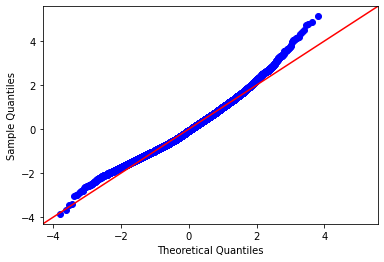

In [159]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Check Homoscedasticity Assumption

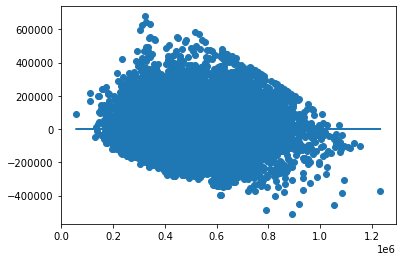

In [160]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Investigate Multicollinearity

In [161]:
# Your code here
X = model_3_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 3.0610607400147),
 ('sqft_lot', 1.2313293054863266),
 ('bedrooms_3', 4.36873944662792),
 ('bedrooms_4', 4.104071479876614),
 ('bedrooms_5', 1.779112452857744),
 ('waterfront_1', 1.0396523199691614),
 ('view_1', 1.1717809736418283),
 ('condition_5', 1.114779952154446),
 ('grade_11', 1.0208904610448402),
 ('grade_3', 1.0026790546800517),
 ('grade_4', 1.0348958239076078),
 ('grade_5', 1.174075258221121),
 ('grade_6', 2.169416141706327),
 ('grade_7', 5.287778975762233),
 ('grade_8', 3.2545336490441357),
 ('grade_9', 1.7980484414053377),
 ('zipcode_98039', 1.0008993813853948),
 ('zipcode_98004', 1.01148201320409),
 ('zipcode_98040', 1.0181546094953509),
 ('zipcode_98112', 1.0234231402535807),
 ('zipcode_98005', 1.0212489115857442),
 ('zipcode_98119', 1.026136133358861),
 ('zipcode_98109', 1.012763416598882),
 ('zipcode_98075', 1.0403012121564275),
 ('zipcode_98006', 1.0435994802573572),
 ('zipcode_98102', 1.0194108625373028),
 ('renovated_1', 1.0436766885329574),
 ('basemen

## Perform Another Round of Feature Selection

In [162]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

28 27


In [163]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     577.0
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:20:46   Log-Likelihood:            -1.8833e+05
No. Observations:               14211   AIC:                         3.767e+05
Df Residuals:                   14183   BIC:                         3.769e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.512e+05   3986.234    113.187      0.000    4.43e+05    4.59e+05
sqft_living    8.654e+04   1904.398     45.443      0.000    8.28e+04    9.03e+04
sqft_lot      -1.655e+04   1283.059    -12.901      0.000   -1.91e+04    -1.4e+04
bedrooms_3    -5.492e+04   3706.309    -14.818      0.000   -6.22e+04   -4.77e+04
bedrooms_4     -5.63e+04   4470.785    -12.593      0.000   -6.51e+04   -4.75e+04
bedrooms_5     -5.82e+04   6276.139     -9.273      0.000   -7.05e+04   -4.59e+04
waterfront_1   1.323e+05   2.66e+04      4.977      0.000    8.02e+04    1.84e+05
view_1         9.855e+04   4681.338     21.052      0.000    8.94e+04    1.08e+05
condition_5    7.133e+04   4371.993     16.316      0.000    6.28e+04    7.99e+04
grade_11       2.912e+05    2.5e+04     11.627      0.000    2.42e+05     3.4e+05
grade_3        3.481e+04   1.38e+05      0.252      0.801   -2.36e+05    3.06e+05
grade_4       -3.051e+04   2.98e+04     -1.024      0.306   -8.89e+04    2.79e+04
grade_5       -5.297e+04   1.11e+04     -4.755      0.000   -7.48e+04   -3.11e+04
grade_6       -3.764e+04   4350.112     -8.652      0.000   -4.62e+04   -2.91e+04
grade_8         3.81e+04   2918.505     13.055      0.000    3.24e+04    4.38e+04
grade_9        1.343e+05   4503.743     29.809      0.000    1.25e+05    1.43e+05
zipcode_98039  5.584e+05    6.9e+04      8.093      0.000    4.23e+05    6.94e+05
zipcode_98004   3.81e+05   1.25e+04     30.439      0.000    3.56e+05    4.06e+05
zipcode_98040  3.033e+05   1.29e+04     23.481      0.000    2.78e+05    3.29e+05
zipcode_98112  2.371e+05   1.24e+04     19.057      0.000    2.13e+05    2.61e+05
zipcode_98005  2.085e+05   1.35e+04     15.400      0.000    1.82e+05    2.35e+05
zipcode_98119   1.98e+05   1.34e+04     14.783      0.000    1.72e+05    2.24e+05
zipcode_98109  2.153e+05   1.85e+04     11.609      0.000    1.79e+05    2.52e+05
zipcode_98075  1.646e+05   9900.390     16.623      0.000    1.45e+05    1.84e+05
zipcode_98006  1.512e+05   8319.205     18.178      0.000    1.35e+05    1.68e+05
zipcode_98102  2.015e+05    1.8e+04     11.220      0.000    1.66e+05    2.37e+05
renovated_1    7.659e+04   6852.986     11.176      0.000    6.32e+04       9e+04
basement_1     1.473e+04   2580.012      5.711      0.000    9677.325    1.98e+04
==============================================================================
Omnibus:                      705.025   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              829.857
Skew:                           0.546   Prob(JB):                    6.29e-181
Kurtosis:                       3.457   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of

In [164]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([143591.23079963, 138332.62825898, 135643.83841823, 136271.38653138,
       141130.46371099, 136054.97892927, 136834.46037108, 134881.34597024,
       139282.27984691, 138526.28290594])

138054.88957426528

2578.1890462357806

In [165]:
# Save model
tuple_objects = (linreg, X_train, y_train)
pickle.dump(tuple_objects, open('model_3.pkl','wb'))

# Predictions with test data

In [166]:
test.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,zipcode_98040,zipcode_98112,zipcode_98005,zipcode_98119,zipcode_98109,zipcode_98075,zipcode_98006,zipcode_98102,renovated_1,basement_1
9566,460000.0,0.054911,0.132866,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5965,425000.0,-0.563981,-0.076958,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
12870,472500.0,-0.563981,0.254571,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18598,515000.0,0.684948,-0.401748,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4716,266000.0,-1.228117,0.208572,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
len(test)

4737

In [168]:
# Fitting the actual model
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:20:55   Log-Likelihood:                -62765.
No. Observations:                4737   AIC:                         1.256e+05
Df Residuals:                    4710   BIC:                         1.258e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.588e+05   6823.109     67.248      0.000    4.45e+05    4.72e+05
sqft_living    9.645e+04   3303.433     29.198      0.000       9e+04    1.03e+05
sqft_lot      -1.874e+04   2229.962     -8.403      0.000   -2.31e+04   -1.44e+04
bedrooms_3    -5.796e+04   6345.756     -9.133      0.000   -7.04e+04   -4.55e+04
bedrooms_4     -6.71e+04   7569.604     -8.864      0.000   -8.19e+04   -5.23e+04
bedrooms_5    -8.886e+04   1.12e+04     -7.966      0.000   -1.11e+05    -6.7e+04
waterfront_1   1.046e+05   3.92e+04      2.666      0.008    2.77e+04    1.81e+05
view_1         1.157e+05   8189.664     14.126      0.000    9.96e+04    1.32e+05
condition_5    6.616e+04   7522.217      8.795      0.000    5.14e+04    8.09e+04
grade_11       3.541e+05   3.87e+04      9.144      0.000    2.78e+05     4.3e+05
grade_3        1.247e-10   3.11e-11      4.010      0.000    6.37e-11    1.86e-10
grade_4        8.292e+04   6.25e+04      1.326      0.185   -3.96e+04    2.05e+05
grade_5       -2.116e+04   1.98e+04     -1.070      0.285   -5.99e+04    1.76e+04
grade_6       -3.186e+04   7550.445     -4.219      0.000   -4.67e+04   -1.71e+04
grade_8        3.707e+04   5059.188      7.327      0.000    2.71e+04     4.7e+04
grade_9        1.225e+05   7781.927     15.736      0.000    1.07e+05    1.38e+05
zipcode_98039  4.948e+05   9.76e+04      5.072      0.000    3.04e+05    6.86e+05
zipcode_98004  3.711e+05   2.57e+04     14.417      0.000    3.21e+05    4.22e+05
zipcode_98040   3.01e+05   2.36e+04     12.761      0.000    2.55e+05    3.47e+05
zipcode_98112  2.401e+05   2.43e+04      9.873      0.000    1.92e+05    2.88e+05
zipcode_98005  2.096e+05   2.39e+04      8.751      0.000    1.63e+05    2.57e+05
zipcode_98119  2.161e+05   2.36e+04      9.148      0.000     1.7e+05    2.62e+05
zipcode_98109  2.189e+05   2.73e+04      8.022      0.000    1.65e+05    2.72e+05
zipcode_98075  1.354e+05   1.75e+04      7.735      0.000    1.01e+05     1.7e+05
zipcode_98006  1.293e+05    1.5e+04      8.620      0.000    9.99e+04    1.59e+05
zipcode_98102  2.178e+05   2.92e+04      7.469      0.000    1.61e+05    2.75e+05
renovated_1    6.599e+04   1.16e+04      5.707      0.000    4.33e+04    8.87e+04
basement_1     1.833e+04   4446.332      4.123      0.000    9616.862    2.71e+04
==============================================================================
Omnibus:                      193.841   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.816
Skew:                           0.501   Prob(JB):                     3.05e-48
Kurtosis:                       3.326   Cond. No.                     1.29e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of

In [169]:
len(x_cols)

27

In [170]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_test = test[x_cols]
y_test = test['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_test, y_test)

scores = cross_val_score(
            linreg, 
            X_test,
            y_test,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([133168.79007523, 137595.22432356, 138961.17158189, 139206.18507356,
       138361.65005943, 141103.4092601 , 139948.91470052, 138995.07601207,
       137027.41105894, 138835.92386844])

138320.37560137545

2026.125445532304

# THINK: LIMIT ZIP CODES, WHAT ARE MY TOP ONES?

Note: Location within King County is important with a noticeable disparity amongst zipcodes. The median house price ranges from \$235,000 in 98002 up to \$1,260,000 in 98039.